逻辑回归问题
===
对于线性回归来说，预测的变量$y$是连续变量，现在我们来讨论分类问题。分类问题与回归问题不同之处在于，$y$的取值是少量的离散值。现在，我们先介绍二元分类（binary classification），也就是$y$只能取$0$或$1$。逻辑回归的思想就是利用Sigmoid函数的阈值只能在0和1之间这个性质来进行工作的

# 1.线性模型之二分类问题-逻辑回归(Logistic)

## 1.1.基本概念
0-1事件就是一个事件发生的概率只有两种可能，我们很自然的联想到使用伯努利族分布对$y$建模，那么如果我们假设1发生的概率为p，那么0发生的概率就是1-p，用一个统一个公式来表示，就是$P\{X=x\}=p^x(1-p)^{1-x}$,定义事件1发生的几率为$odds=\frac{p}{1-p}$,对数几率$z=ln(odds)$,那么可
以推导出如下公式：
$$P\{X=x\}=\frac{1}{1+e^{-z}}$$
令$\varphi = ln\frac{p}{1-p}$，有
$$
\begin{aligned}
e^{\varphi}&=\frac{p}{1-p}\\
&\Rightarrow p=\frac{e^{\varphi}}{1+e^{\varphi}}\\
&\Rightarrow p=\frac{1}{1+e^{-\varphi}}
\end{aligned}
$$
这里我们推出了Sigmoid函数.这是因为Logistic模型对问题的前置概率估计其实就是伯努利分布。

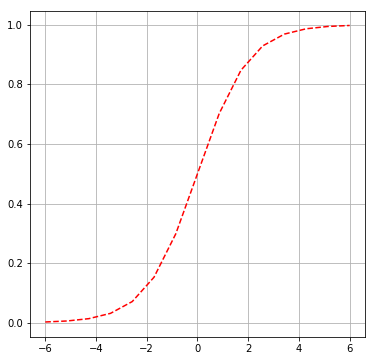

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
lineX = np.linspace(-6,6, 15)
y=1/(1+np.e**(-lineX))

plt.figure(figsize=(6,6), facecolor='white')
plt.plot(lineX, y, 'r--')
plt.grid(True)

## 1.2.Logistic公式
有
$$h_{\theta}(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$
求导有
$$
\begin{aligned}
g'(x)&=(\frac{1}{1+e^{-x}})'\\
&=\frac{e^{-x}}{(1+e^{-x})^2}\\
&=\frac{1}{1+e^{-x}} \bullet \frac{e^{-x}}{1+e^{-x}}\\
&=\frac{1}{1+e^{-x}} \bullet (1-\frac{1}{1+e^{-x}})\\
&=g(x) \bullet (1-g(x))
\end{aligned}
$$

## 1.3.似然函数
假定$\begin{cases}
P(y=1|x;\theta)=h_{\theta}(x)\\\\
P(y=0|x;\theta)=1-h_{\theta}(x)
\end{cases}$，那么就有
$$p(y|x;\theta)=(h_{\theta}(x))^y(1-h_{\theta}(x))^{1-y}$$
那么似然函数
$$L(\theta)=p(\overrightarrow{y}|X;\theta)=\prod_{i=1}^m[h_{\theta}(x^{(i)})]^{y^{(i)}} \bullet [1-h_{\theta}(x^{(i)})]^{1-y^{(i)}}$$

## 1.4.对数似然函数
$$
\begin{aligned}
L(\theta)&=\prod_{i=1}^m[h_{\theta}(x^{(i)})]^{y^{(i)}} \bullet [1-h_{\theta}(x^{(i)})]^{1-y^{(i)}}\\
&\Rightarrow \ell(\theta)=logL(\theta)\\
&=\sum_{i=1}^my^{(i)}logh_{\theta}(x^{(i)})+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))
\end{aligned}
$$

## 1.5.对数似然求偏导
已知条件有：
$$
\begin{cases}
h_{\theta}(x^{(i)})=g(\theta^Tx^{(i)}) &(1)\\\\
g'(z)=g(z) \bullet (1-g(z)) &(2)
\end{cases}
$$
所以有:

$$
\begin{aligned}
\frac{\partial{\ell(\theta)}}{\partial{\theta_j}}&=\sum_{i=1}^m[y^{(i)} \bullet \frac{1}{h_{\theta}(x^{(i)})} \bullet \frac{\partial{h_{\theta}(x^{(i)})}}{\partial{\theta_j}} + (1-y^{(i)}) \bullet -\frac{1}{1-h_{\theta}(x^{(i)})} \bullet \frac{\partial{h_{\theta}(x^{(i)})}}{\partial{\theta_j}}]\\
&=\sum_{i=1}^m[\frac{y^{(i)}}{h_{\theta}(x^{(i)})}-\frac{1-y^{(i)}}{1-h_{\theta}(x^{(i)})}] \bullet \frac{\partial{h_{\theta}(x^{(i)})}}{\partial{\theta_j}}\\
&\Rightarrow \sum_{i=1}^m[\frac{y^{(i)}}{g(\theta^Tx^{(i)})}-\frac{1-y^{(i)}}{1-g(\theta^Tx^{(i)})}] \bullet \frac{\partial{g(\theta^Tx^{(i)})}}{\partial{\theta_j}} \\
&\Rightarrow \sum_{i=1}^m[\frac{y^{(i)}}{g(\theta^Tx^{(i)})}-\frac{1-y^{(i)}}{1-g(\theta^Tx^{(i)})}] \bullet g(\theta^Tx^{(i)}) \bullet [1-g(\theta^Tx^{(i)})] \bullet \frac{\partial{\theta^Tx^{(i)}}}{\partial{\theta_j}} \\
&\Rightarrow \sum_{i=1}^m[y^{(i)}(1-g(\theta^Tx^{(i)})) - (1-y^{(i)})g(\theta^Tx^{(i)})] \bullet x_j^{(i)}\\
&\Rightarrow \sum_{i=1}^m[y^{(i)} - g(\theta^Tx^{(i)})] \bullet x_j^{(i)}
\end{aligned}
$$

## 1.7.参数学习
$$\theta_j:=\theta_j+\alpha\sum_{i=1}^m(y^{(i)}-h_{\theta}(x^{(i)}))x_j^{(i)}$$
有了这个，就可以进行参数学习了。

## 1.8.梯度上升法-梯度下降法的反方法

In [2]:
def Gradient_Ascent_test():
    def f_prime(x_old):                                    #f(x)的导数
        return -2 * x_old + 4
    x_old = -1                                            #初始值，给一个小于x_new的值
    x_new = 0                                            #梯度上升算法初始值，即从(0,0)开始
    alpha = 0.01                                        #步长，也就是学习速率，控制更新的幅度
    presision = 0.00000001                                #精度，也就是更新阈值
    while abs(x_new - x_old) > presision:
        x_old = x_new
        x_new = x_old + alpha * f_prime(x_old)            #上面提到的公式
    print(x_new)                                        #打印最终求解的极值近似值

if __name__ == '__main__':
    Gradient_Ascent_test()

1.999999515279857


## 1.9.总结
我们发现这个式子和线性回归的形式是完全一样的，如果我们定义$h_{\theta}(x)=\theta{X}$，那么就是线性回归，如果我们定义$h_{\theta}(x)=\frac{1}{1+e^{-\theta{x}}}$，那么就是logistic回归。Logistic回归中，我们假定模型服从的是二项分布，利用最大似然估计进行推导的；线性回归我们假定模型服从高斯分布，利用最大似然估计推导的；正是因为二项分布和高斯分布都是指数族分布，所以它们才能得到一样的参数学习法则其实Logistic回归是一个广义的线性模型，这是因为
$$logit(p)=log\frac{p}{1-p}=log\frac{h_{\theta}(x)}{1-h_{\theta}(x)}=log(\frac{\frac{1}{1+e^{-\theta^T{x}}}}{\frac{e^{-\theta^T{x}}}{1+e^{-\theta^T{x}}}})=loge^{-\theta^T{x}}=\theta^Tx$$

# 2.线性回归之多分类问题-Softmax回归
利用线性模型来进行多分类，就是Softmax回归

## 2.1.定义
设样本为一个m行的记录$X=\{\overrightarrow{x_1},\overrightarrow{x_2},...,\overrightarrow{x_n}\}$, 共有K的类别，那么存在这么K个$\Theta$向量$\overrightarrow{\theta_1},\overrightarrow{\theta_2},...,\overrightarrow{\theta_K}$。令$Z=\Theta^TX$，且
设$\varphi=\frac{1}{1+e^{-Z}}$，则有$\varphi=\frac{1}{1+e^{-\Theta^TX}}$
- 如果K=2，那么就是Logistic回归。分类为$y \in \{0, 1\}$，带入$\varphi$函数后，总能求的一个0~1之间的值，我们用0.5做分界点，大于0.5的就是分类1，否则就是分类0
- 如果K>2，那么就是softmax回归

## 2.2.似然函数
令$C_i=e^{\overrightarrow{\theta_i}^T\overrightarrow{x_i}}$，则第i行的概率为
$$p(c=k|x;\theta)=\frac{e^{\theta_k^Tx}}{\sum_{i=1}^Ke^{\theta_i^Tx}}, k=1,2,...,K$$
似然函数为
$$L(\theta)=\prod_{i=1}^m\prod_{k=1}^Kp(c=k|x^{(i)};\theta)^{y_k^{(i)}}=\prod_{i=1}^m\prod_{k=1}^K[\frac{e^{\theta_k^Tx}}{\sum_{i=1}^Ke^{\theta_i^Tx}}]^{y_k^{(i)}}$$

## 2.3.对数似然  
$$J_m(\theta)=lnL(\theta)=\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)} \bullet (\theta_k^Tx^{(i)}-ln\sum_{i=1}^Ke^(\theta_i^Tx^{(i)}))$$

## 2.4.损失函数
$$J(\theta)=\sum_{k=1}^Ky_k \bullet (\theta_k^Tx-ln\sum_{i=1}^Ke^{\theta_i^Tx})$$

## 2.5.随机梯度
$$\frac{\partial{J(\theta)}}{\partial{\theta_k}}=(y_k-p(y_k|x;\theta)) \bullet x$$

# 3.一般线性问题的建模过程
- 根据训练集$x^{(i)},y^{(i)}$选择概率分布模型，参数为$\phi$；
- 将该分布写为指数分布族的形式，参数为$\eta$；
- 可以得到正则响应函数$g(\eta)=\mathrm{E}[T(y);\eta]$；
- 将$\eta=\theta^Tx$带入正则响应函数得到假设函数$h_\theta(x)=g(\theta^Tx)$；
- 根据模型的概率解释得到似然函数$L(\theta)=p(y^{(i)}\mid x^{(i)};\theta)$（根据假设函数得到）；
- 取合适的$\theta$使似然函数最大化。

## 3.1.Logistic回归的一般过程
Logistic回归的一般过程：
- 收集数据：采用任意方法收集数据。
- 准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。
- 分析数据：采用任意方法对数据进行分析。
- 训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。
- 测试算法：一旦训练步骤完成，分类将会很快。
- 使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数，就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。

# 4.使用逻辑回归进行分类

predict acc [0.97]


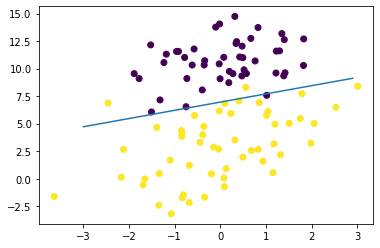

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

data_path = os.path.join("../../data")

def loaddataset():
    datamat = []                                                        #创建数据列表
    labelmat = []                                                        #创建标签列表
    fr = open(os.path.join(data_path, 'logisticData.txt'))               #打开文件
    for line in fr.readlines():                                            #逐行读取
        lineArr = line.strip().split()                                    #去回车，放入列表
        datamat.append([1.0, float(lineArr[0]), float(lineArr[1])])        #添加数据
        labelmat.append(int(lineArr[2]))                                #添加标签
    fr.close()                                                            #关闭文件
    return datamat, labelmat

X, Y = loaddataset()
X = np.asarray(X)
Y = np.asarray(Y)
Y = Y.reshape(-1,1)

class LogisticRegression(object):
    def __init__(self):
        self.sigmoid = lambda x:1./(1+np.exp(-x))
    def fit(self, X, y):
        self.w = np.random.randn(X.shape[1],1)
        for _ in range(10000):
            y_pred = self.sigmoid(X @ self.w)
            #self.w += 0.01 * X.T @ (y - y_pred) #梯度上升
            self.w -= 0.0001 * X.T @ (y_pred - y) # 梯度下降
            #bar.show(np.mean(0.5*(y_pred- y)**2))
    def predict(self,X):
        y_pred = np.round(self.sigmoid(X.dot(self.w)))
        return y_pred

lr = LogisticRegression()
lr.fit(X,Y)
y_pred = lr.predict(X)
accuracy = np.sum(Y == y_pred, axis=0) / len(Y)
print('predict acc %s' % accuracy)

plt.figure(facecolor='w')
plt.scatter(X[:,1], X[:,2], c = Y[:, 0])
x = np.arange(-3.0, 3.0, 0.1)
y = (-lr.w[0] - lr.w[1] * x) / lr.w[2]
plt.plot(x, y)

# 5.使用逻辑回归对鸢尾花数据进行分类

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p torch

Sebastian Raschka 

CPython 3.6.10
IPython 7.12.0

torch 1.3.1


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import torch
import torch.nn.functional as F
%matplotlib inline

## 5.1.准备数据

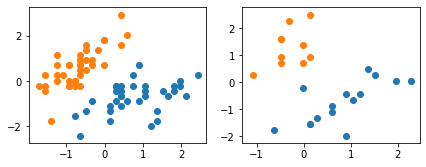

In [3]:
ds = np.lib.DataSource()
fp = ds.open('../../data/iris.data')

x = np.genfromtxt(BytesIO(fp.read().encode()), delimiter=',', usecols=range(2), max_rows=100)
y = np.zeros(100)
y[50:] = 1

np.random.seed(1)
idx = np.arange(y.shape[0])
np.random.shuffle(idx)
X_test, y_test = x[idx[:25]], y[idx[:25]]
X_train, y_train = x[idx[25:]], y[idx[25:]]
mu, std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train, X_test = (X_train - mu) / std, (X_test - mu) / std

fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
ax[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1])
ax[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1])

## 5.2.手动实现梯度

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def custom_where(cond, x_1, x_2):
    return (cond * x_1) + ((~cond) * x_2)

class LogisticRegression1():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)

    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights), self.bias)
        probas = self._sigmoid(linear)
        return probas
        
    def backward(self, probas, y):  
        errors = y - probas.view(-1)
        return errors
            
    def predict_labels(self, x):
        probas = self.forward(x)
        labels = custom_where(probas >= .5, 1, 0)
        return labels    
            
    def evaluate(self, x, y):
        labels = self.predict_labels(x).float()
        accuracy = torch.sum(labels.view(-1) == y) / y.size()[0]
        return accuracy
    
    def _sigmoid(self, z):
        return 1. / (1. + torch.exp(-z))
    
    def _logit_cost(self, y, proba):
        tmp1 = torch.mm(-y.view(1, -1), torch.log(proba))
        tmp2 = torch.mm((1 - y).view(1, -1), torch.log(1 - proba))
        return tmp1 - tmp2
    
    def train(self, x, y, num_epochs, learning_rate=0.01):
        for e in range(num_epochs):
            
            #### Compute outputs ####
            probas = self.forward(x)
            
            #### Compute gradients ####
            errors = self.backward(probas, y)
            neg_grad = torch.mm(x.transpose(0, 1), errors.view(-1, 1))
            
            #### Update weights ####
            self.weights += learning_rate * neg_grad
            self.bias += learning_rate * torch.sum(errors)
            
            #### Logging ####
            print('Epoch: %03d' % (e+1), end="")
            print(' | Train ACC: %.3f' % self.evaluate(x, y), end="")
            print(' | Cost: %.3f' % self._logit_cost(y, self.forward(x)))

In [5]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

logr = LogisticRegression1(num_features=2)
logr.train(X_train_tensor, y_train_tensor, num_epochs=10, learning_rate=0.1)

print('\nModel parameters:')
print('  Weights: %s' % logr.weights)
print('  Bias: %s' % logr.bias)

Epoch: 001 | Train ACC: 0.000 | Cost: 5.581
Epoch: 002 | Train ACC: 0.000 | Cost: 4.882
Epoch: 003 | Train ACC: 1.000 | Cost: 4.381
Epoch: 004 | Train ACC: 1.000 | Cost: 3.998
Epoch: 005 | Train ACC: 1.000 | Cost: 3.693
Epoch: 006 | Train ACC: 1.000 | Cost: 3.443
Epoch: 007 | Train ACC: 1.000 | Cost: 3.232
Epoch: 008 | Train ACC: 1.000 | Cost: 3.052
Epoch: 009 | Train ACC: 1.000 | Cost: 2.896
Epoch: 010 | Train ACC: 1.000 | Cost: 2.758

Model parameters:
  Weights: tensor([[ 4.2267],
        [-2.9613]])
  Bias: tensor([0.0994])


## 5.3.预测模型

In [6]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = logr.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


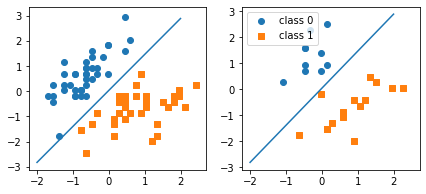

In [7]:
w, b = logr.weights, logr.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) / w[1] )

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')

## 5.4.自动梯度实现

In [8]:
def custom_where(cond, x_1, x_2):
    return (cond * x_1) + ((1-cond) * x_2)

class LogisticRegression2():
    def __init__(self, num_features):
        self.num_features = num_features
        
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float32,
                                   device=device,
                                   requires_grad=True) # req. for autograd!
        self.bias = torch.zeros(1, 
                                dtype=torch.float32,
                                device=device,
                                requires_grad=True) # req. for autograd!

    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights), self.bias)
        probas = self._sigmoid(linear)
        return probas
                    
    def predict_labels(self, x):
        probas = self.forward(x)
        labels = custom_where((probas >= .5).float(), 1, 0)
        return labels    
            
    def evaluate(self, x, y):
        labels = self.predict_labels(x)
        accuracy = (torch.sum(labels.view(-1) == y.view(-1))).float() / y.size()[0]
        return accuracy
    
    def _sigmoid(self, z):
        return 1. / (1. + torch.exp(-z))
    
    def _logit_cost(self, y, proba):
        tmp1 = torch.mm(-y.view(1, -1), torch.log(proba))
        tmp2 = torch.mm((1 - y).view(1, -1), torch.log(1 - proba))
        return tmp1 - tmp2
    
    def train(self, x, y, num_epochs, learning_rate=0.01):
        
        for e in range(num_epochs):
            
            #### Compute outputs ####
            proba = self.forward(x)
            cost = self._logit_cost(y, proba)
            
            #### Compute gradients ####
            cost.backward()
            
            #### Update weights ####
            
            tmp = self.weights.detach()
            tmp -= learning_rate * self.weights.grad
            
            tmp = self.bias.detach()
            tmp -= learning_rate * self.bias.grad
            
            #### Reset gradients to zero for next iteration ####
            self.weights.grad.zero_()
            self.bias.grad.zero_()
    
            #### Logging ####
            print('Epoch: %03d' % (e+1), end="")
            print(' | Train ACC: %.3f' % self.evaluate(x, y), end="")
            print(' | Cost: %.3f' % self._logit_cost(y, self.forward(x)))

In [9]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

logr = LogisticRegression2(num_features=2)
logr.train(X_train_tensor, y_train_tensor, num_epochs=10, learning_rate=0.1)

print('\nModel parameters:')
print('  Weights: %s' % logr.weights)
print('  Bias: %s' % logr.bias)

Epoch: 001 | Train ACC: 0.987 | Cost: 5.581
Epoch: 002 | Train ACC: 0.987 | Cost: 4.882
Epoch: 003 | Train ACC: 1.000 | Cost: 4.381
Epoch: 004 | Train ACC: 1.000 | Cost: 3.998
Epoch: 005 | Train ACC: 1.000 | Cost: 3.693
Epoch: 006 | Train ACC: 1.000 | Cost: 3.443
Epoch: 007 | Train ACC: 1.000 | Cost: 3.232
Epoch: 008 | Train ACC: 1.000 | Cost: 3.052
Epoch: 009 | Train ACC: 1.000 | Cost: 2.896
Epoch: 010 | Train ACC: 1.000 | Cost: 2.758

Model parameters:
  Weights: tensor([[ 4.2267],
        [-2.9613]], requires_grad=True)
  Bias: tensor([0.0994], requires_grad=True)


## 5.5.预测模型

In [10]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = logr.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


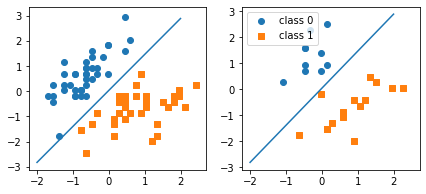

In [11]:
w, b = logr.weights, logr.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) / w[1] )

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')